In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline 

In [2]:
spotify_df = pd.read_csv('data.csv')

In [3]:
spotify_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [4]:
spotify_df.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.143,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.882,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.616,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.413,110.547,190239,5,1
194,0.747,0.6660,11,-7.845,1,0.1970,0.1300,0.000000,0.3600,0.531,77.507,177213,4,1


In [5]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [6]:
spotify_df.shape

(195, 14)

In [7]:
spotify_df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [8]:
spotify_df['liked'].value_counts()

1    100
0     95
Name: liked, dtype: int64

In [9]:
X = spotify_df.drop('liked' , axis = 1)
y = spotify_df['liked']

In [10]:
X = spotify_df.drop('liked' , axis = 1)
y = spotify_df['liked']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , roc_auc_score , confusion_matrix

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3)

In [14]:
print("the shapes of x-train and x-test are : " , X_train.shape , X_test.shape)
print("the shapes of y-train and y-test are : " , y_train.shape , y_test.shape)

the shapes of x-train and x-test are :  (136, 13) (59, 13)
the shapes of y-train and y-test are :  (136,) (59,)


Text(0.5, 1.0, 'Correlation HeatMap')

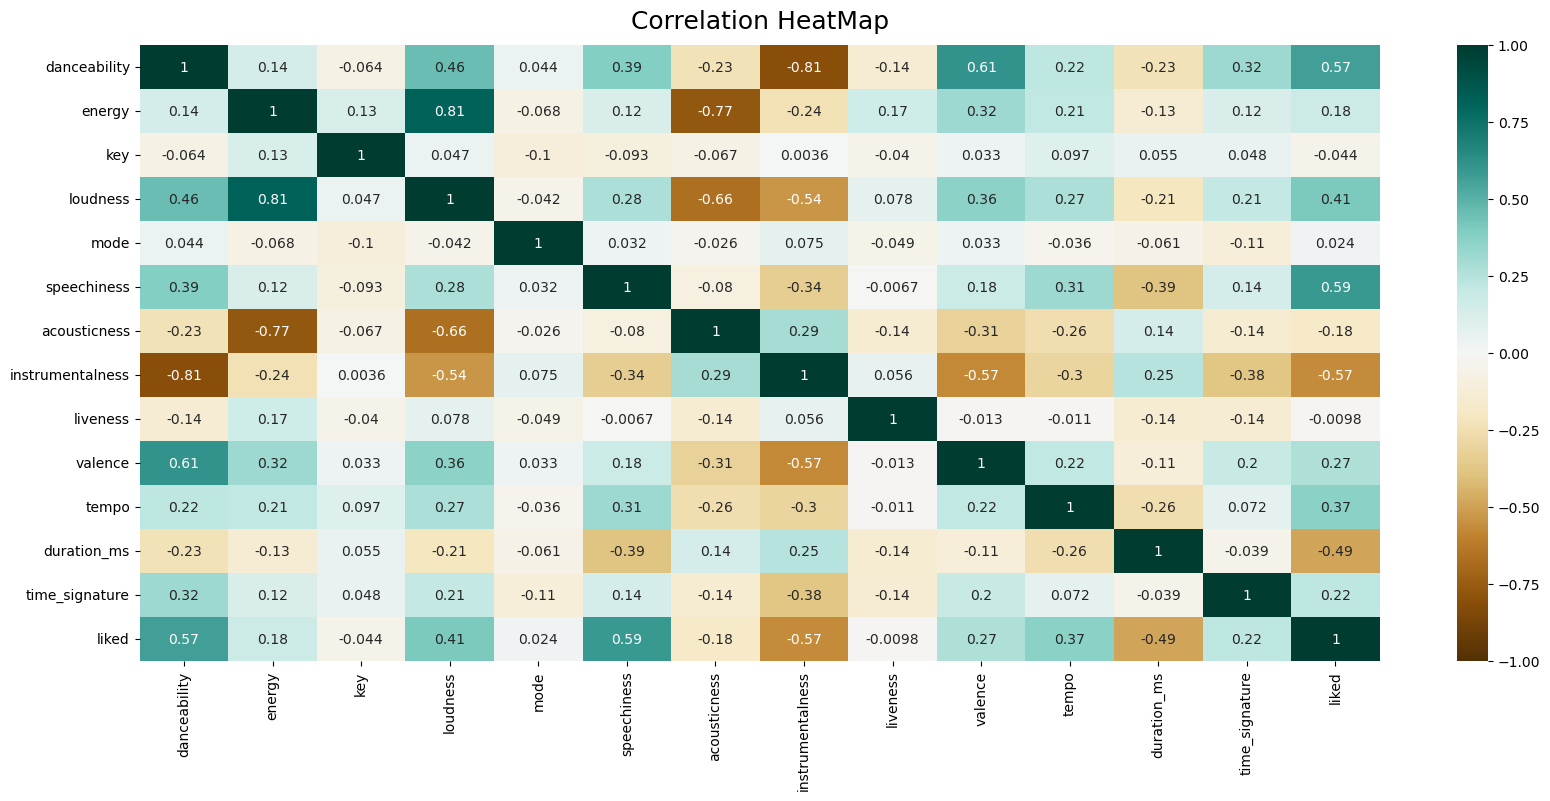

In [15]:
plt.figure(figsize=(20,8))
heatmap = sns.heatmap(spotify_df.corr() , vmin=-1 , vmax=1 ,annot=True , cmap='BrBG')
heatmap.set_title('Correlation HeatMap' , fontdict = {'fontsize' : 18} , pad=12)

In [16]:
from sklearn.tree import DecisionTreeClassifier , plot_tree

In [17]:
dt_clf = DecisionTreeClassifier()

In [18]:
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier()

In [19]:
y_preds_dt = dt_clf.predict(X_test)

In [20]:
print("Accuracy Score of the Decision Tree Model" , accuracy_score(y_test , y_preds_dt))
print("ROC AUC score of the Decision Tree Model is : " , roc_auc_score(y_test , y_preds_dt))

Accuracy Score of the Decision Tree Model 0.8305084745762712
ROC AUC score of the Decision Tree Model is :  0.8292824074074074


Text(0.5, 1.0, 'Confusin Matrix Of Decision Tree Model')

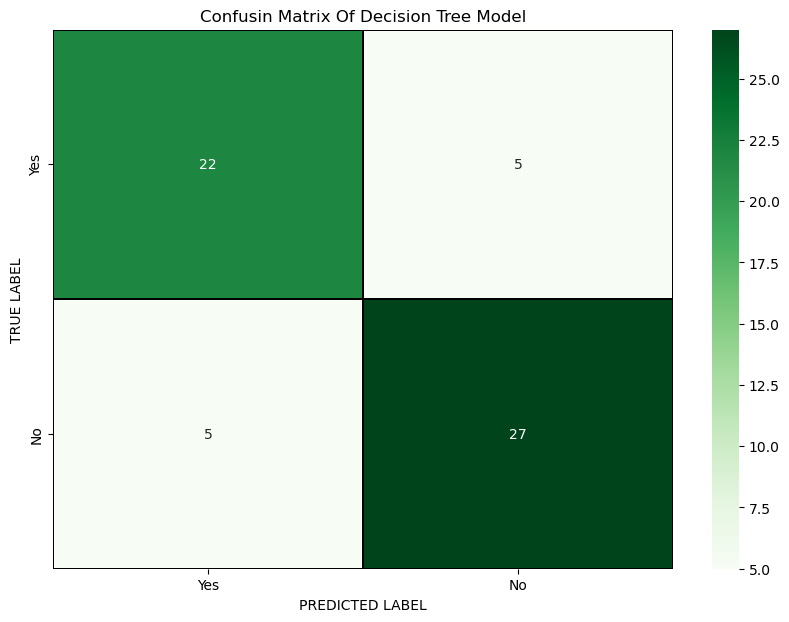

In [21]:
cm  = confusion_matrix(y_test , y_preds_dt)

x_axis_labels = ["Yes" , "No"]
y_axis_labels = ["Yes" , "No"]

f , ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm , annot=True, linewidths=0.2 , linecolor="black" , fmt=".0f" , ax=ax , cmap="Greens" , 
           xticklabels=x_axis_labels , yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusin Matrix Of Decision Tree Model")

In [22]:
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier , BaggingClassifier , AdaBoostClassifier

In [23]:
rf_clf = RandomForestClassifier(n_estimators=100)
extratree_clf = ExtraTreesClassifier(n_estimators=100)
bg_clf = BaggingClassifier(n_estimators=100)
ada_clf = AdaBoostClassifier(n_estimators=100)

In [24]:
rf_clf.fit(X_train , y_train)
extratree_clf.fit(X_train , y_train)
bg_clf.fit(X_train , y_train)
ada_clf.fit(X_train , y_train)

AdaBoostClassifier(n_estimators=100)

In [25]:
y_preds_rf = rf_clf.predict(X_test)
y_preds_et = extratree_clf.predict(X_test)
y_preds_bg = bg_clf.predict(X_test)
y_preds_ada = ada_clf.predict(X_test)

In [26]:
print("Accuracy Score of the Random Forest Model", accuracy_score(y_test, y_preds_rf))
print("Accuracy Score of the Extre Tree Classifier Model", accuracy_score(y_test, y_preds_et))
print("Accuracy Score of the Bagging Classifier Model", accuracy_score(y_test, y_preds_bg))
print("Accuracy Score of the AdaBoost Classifier Model", accuracy_score(y_test, y_preds_ada))

Accuracy Score of the Random Forest Model 0.9322033898305084
Accuracy Score of the Extre Tree Classifier Model 0.9491525423728814
Accuracy Score of the Bagging Classifier Model 0.8813559322033898
Accuracy Score of the AdaBoost Classifier Model 0.9152542372881356


In [27]:
print("ROC AUC Score of the Random Forest Model", roc_auc_score(y_test, y_preds_rf))
print("ROC AUC Score of the Extre Tree Classifier Model", roc_auc_score(y_test, y_preds_et))
print("ROC AUC Score of the Bagging Classifier Model", roc_auc_score(y_test, y_preds_bg))
print("ROC AUC Score of the AdaBoost Classifier Model", roc_auc_score(y_test, y_preds_ada))

ROC AUC Score of the Random Forest Model 0.9288194444444444
ROC AUC Score of the Extre Tree Classifier Model 0.947337962962963
ROC AUC Score of the Bagging Classifier Model 0.8761574074074074
ROC AUC Score of the AdaBoost Classifier Model 0.9074074074074074


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier Model')

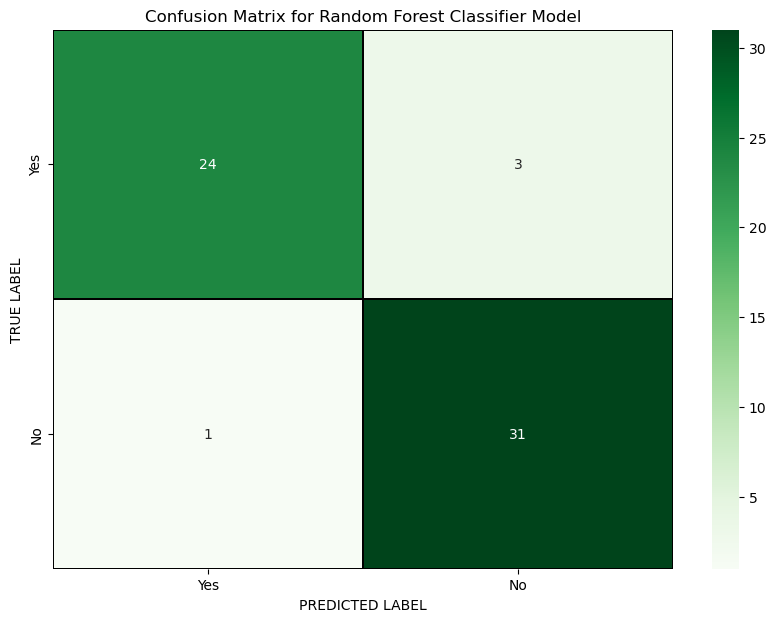

In [28]:
cm = confusion_matrix(y_test, y_preds_rf)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier Model')

Text(0.5, 1.0, 'Confusion Matrix for Extra Tree Classifier Model')

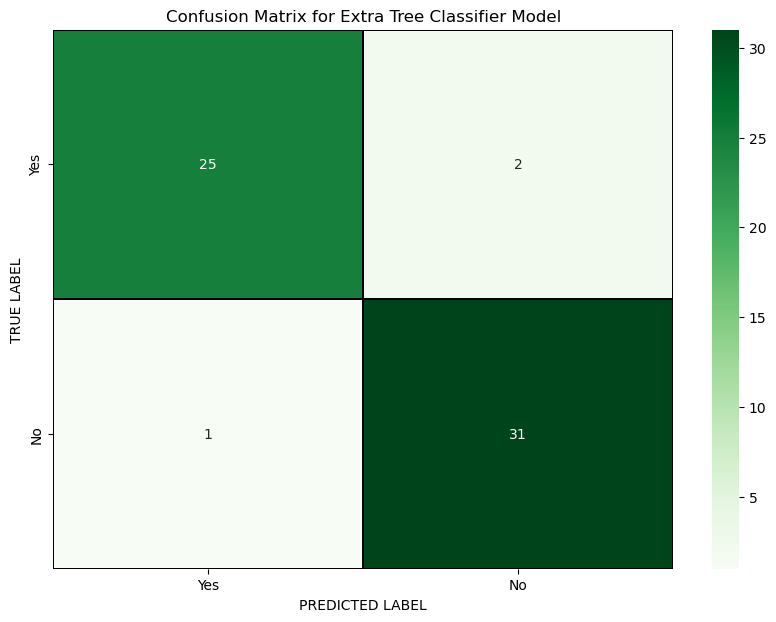

In [29]:
cm = confusion_matrix(y_test, y_preds_et)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Extra Tree Classifier Model')

Text(0.5, 1.0, 'Confusion Matrix for Bagging Classifier Model')

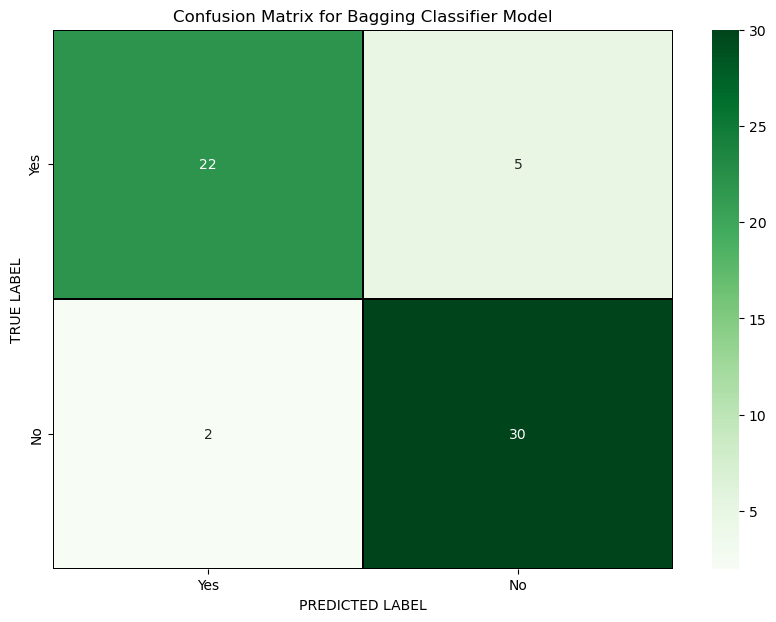

In [30]:
cm = confusion_matrix(y_test, y_preds_bg)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Bagging Classifier Model')

Text(0.5, 1.0, 'Confusion Matrix for AdaBoost Classifier Model')

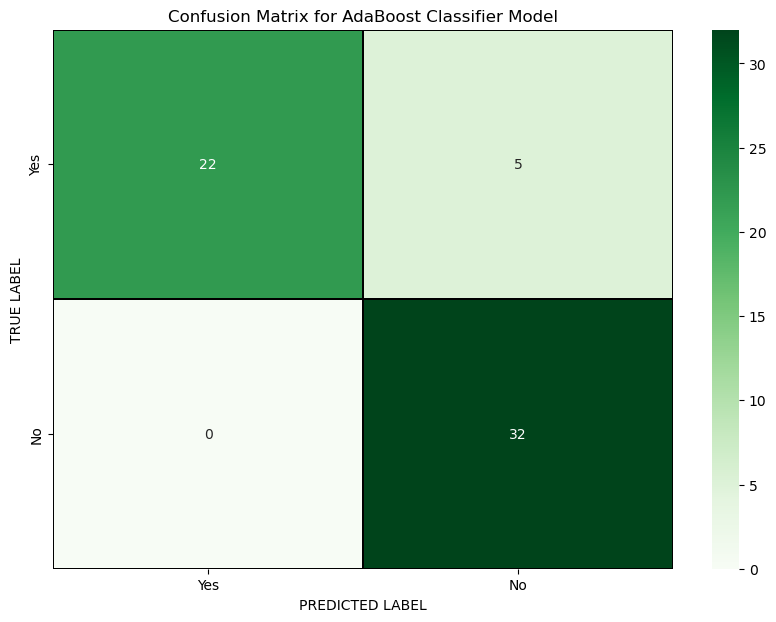

In [31]:
cm = confusion_matrix(y_test, y_preds_ada)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoost Classifier Model')

In [34]:
from lightgbm import LGBMClassifier

In [35]:
lgbm_clf = LGBMClassifier()

In [36]:
lgbm_clf.fit(X_train , y_train)

[LightGBM] [Info] Number of positive: 68, number of negative: 68
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 136, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

LGBMClassifier()

In [37]:
y_preds_lgbm = lgbm_clf.predict(X_test)

In [38]:
print("Accuracy Score of the LGBM Model", accuracy_score(y_test, y_preds_lgbm))
print("ROC AUC Score of the LGBM Model", roc_auc_score(y_test, y_preds_lgbm))

Accuracy Score of the LGBM Model 0.9152542372881356
ROC AUC Score of the LGBM Model 0.9103009259259259


Text(0.5, 1.0, 'Confusion Matrix for LGBM Classifier Model')

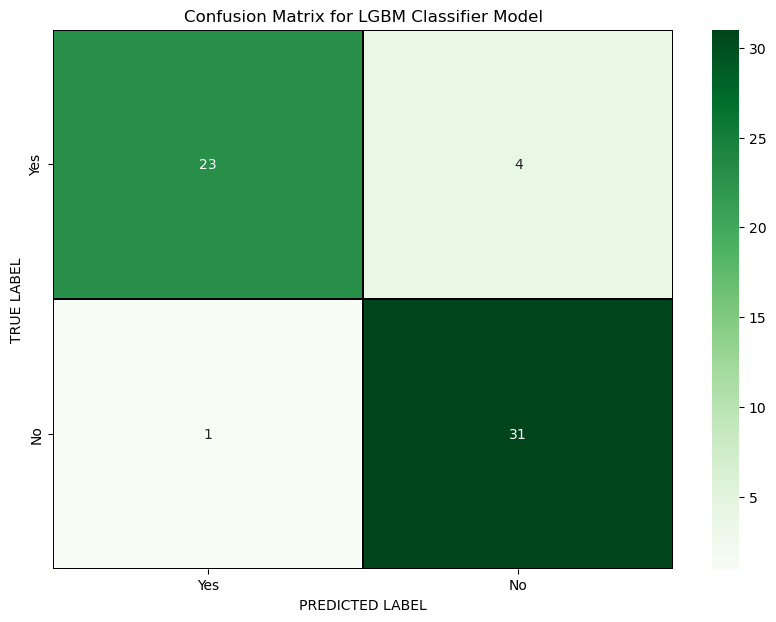

In [39]:
cm = confusion_matrix(y_test, y_preds_lgbm)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LGBM Classifier Model')

In [40]:
from joblib import dump
MODEL_NAME = "Spotify-recommender.pkl"
dump(extratree_clf , MODEL_NAME)

['Spotify-recommender.pkl']